# Lending Club Case Study - Overview

When a person applies for a loan, there are two types of decisions that could be taken by the company:

- **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

  - **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)

  - **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

  - **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

- **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

**Results Expected**:
- Write all your code in one well-commented Python file; briefly mention the insights and observations from the analysis 
- Present the overall approach of the analysis in a presentation: 
- Mention the problem statement and the analysis approach briefly 
- Explain the results of univariate, bivariate analysis etc. in business terms
- Include visualisations and summarise the most important results in the presentation

# Solution

Lets drill down analysis step by step to solve the above problem.

<u>Data analysis steps to be followed:</u>
1. Data Understanding.
2. Data Cleaning and Manipulation.
3. Data Analysis and Visualization.
4. Conclusion.


# Step: 1 - Data Understanding


## Importing Libraries for Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

In [2]:
#For Dataframe - Modifying default limit of dataframe (optional cell to run)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
df_loan = pd.read_csv('loan.csv')
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
df_loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
df_loan.shape

(39717, 111)

In [6]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
df_loan.isna().sum().sort_values(ascending=False)

total_il_high_credit_limit    39717
mo_sin_old_rev_tl_op          39717
bc_util                       39717
bc_open_to_buy                39717
avg_cur_bal                   39717
                              ...  
pub_rec                           0
open_acc                          0
inq_last_6mths                    0
earliest_cr_line                  0
id                                0
Length: 111, dtype: int64

# Step: 2 - Data Cleaning and Manipulation.

###  Overviewing the Dataframe Shape, Null Values, Duplicate Values

In [8]:
# Number of Columns in the Dataframe
print('Number of Columns:{0:10d}'.format(df_loan.shape[1]))

# Number of Rows in the Dataframe
print('Number of Rows:{0:15d}'.format(df_loan.shape[0]))

# Number of Missing Values in the Dataframe
print('# of Missing Values:{0:12d}'.format(df_loan.isnull().sum().sum()))

# Number of Unique Values in the Dataframe
print('# of Unique Values:{0:12d}'.format(df_loan.nunique().sum()))

# Number of Duplicates Values in the Dataframe
print('# of Duplicate Values:{0:4d}'.format(df_loan.duplicated().sum()))

Number of Columns:       111
Number of Rows:          39717
# of Missing Values:     2263364
# of Unique Values:      416801
# of Duplicate Values:   0


In [9]:
# Finding percentage of null or missing values
df_na_perc = round(100*(df_loan.isnull().sum()/len(df_loan.index)), 2)

# Printing columns which have more than 0% missing values
df_na_perc[df_na_perc > 0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [10]:
# Count of columns which have no values in it.
print(df_na_perc[df_na_perc >= 100].shape)

# Count of columns which have more than 20% null values in it.
print(df_na_perc[df_na_perc > 20].shape)

(54,)
(58,)


##  Strategy for columns

### Stage: 1 - Identifying the columns with null values and assessing their relevance to the analysis.

"There are 54 columns as mentioned above, which are empty. Hence we can drop those columns"

In [11]:
# Dropping columns which has more than 20% of null values in it.
df_loan.drop(df_na_perc[df_na_perc>20].index, axis=1, inplace=True)

# After dropping off the columns, these is the new shape of the dataframe
df_loan.shape

(39717, 53)

### Stage: 2 - Identifying unique values in the columns and analyzing the data.

In [12]:
# checking unique values in each column
df_loan.nunique().sort_values().head(25)

tax_liens                      1
delinq_amnt                    1
chargeoff_within_12_mths       1
acc_now_delinq                 1
application_type               1
policy_code                    1
collections_12_mths_ex_med     1
initial_list_status            1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
verification_status            3
loan_status                    3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
dtype: int64

"It is recommended to drop columns with only one unique value. In our case, there are no such columns, so we can proceed with the analysis."

In [13]:
df_unique_val = df_loan.nunique()
df_unique_val = df_unique_val[df_unique_val.values == 1]
df_unique_val.head()

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
dtype: int64

In [14]:
# dropping columns with only one unique value from the primary dataframe table
df_loan.drop(df_unique_val.index, axis=1, inplace=True)

# Re-checking shape to ensure that drop was done successfully
df_loan.shape

(39717, 44)

In [15]:
# checking unique values in each column

df_loan.nunique().sort_values(ascending=False).head(10)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
revol_bal          21711
title              19615
dtype: int64

"The columns `id`, `url`, and `member_id` all contain unique values, making any of them suitable as a primary key. We'll use `id` as the primary key and remove the `url` and `member_id` columns."

"The columns `title`, and `emp_title` are not useful data for our analysis purpose. Hence removing the `title` and `emp_title` columns as well."

In [16]:
# dropping ['member_id', 'url'] columns from the primary dataframe table
df_loan.drop(['member_id', 'url', 'title', 'emp_title'], axis=1, inplace=True)

# Re-checking shape to ensure that drop was done successfully
df_loan.shape

(39717, 40)

### Stage: 3 - Review the remaining columns to assess their importance for the analysis
"Any columns deemed less relevant can be dropped."

In [17]:
df_loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

"The borrower-related columns like: `out_prncp`, `out_prncp_inv`, `total_pymnt_inv`, `total_rec_prncp`, `total_rec_int`, `last_credit_pull_d`, `last_pymnt_d` and `total_rec_late_fee` are relevant only for those who have already taken out a loan. Since we are focusing solely on loan application details, these columns can be removed. Similarly, the recoveries columns like: `recoveries`, `collection_recovery_fee` and `last_pymnt_amnt` pertain only to charged-off loans, so we`ll remove those as well."

In [18]:
cols = ['out_prncp', 'out_prncp_inv', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_d', 
        'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']
df_loan.drop(cols, axis=1, inplace=True)
df_loan.shape

(39717, 29)

##  Strategy for rows

"The `Loan Status` column has three distinct values, but we only need `Fully Paid` and `Charged Off`. Therefore, we'll remove the rows where `Loan Status` is `Current`."

In [19]:
# dropping rows where status = current for column loan status
df_loan = df_loan[df_loan.loan_status != 'Current']

In [20]:
df_loan.shape

(38577, 29)

In [21]:
# Checking unique number of values for the column=term.
print(df_loan.term.unique())

# removing the empty spaces from the unique values.
df_loan['term'] = df_loan.term.str.strip()
df_loan.term.unique()

[' 36 months' ' 60 months']


array(['36 months', '60 months'], dtype=object)

In [22]:
df_loan.isna().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
total_pymnt                0
pub_rec_bankruptcies     697
dtype: int64

In [23]:
# Dropping the null rows for the column=['emp_length', 'revol_util', 'pub_rec_bankruptcies']
df_loan.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)

# Checking via percentage for any other null or missing values.
df_na_perc = round(100*(df_loan.isnull().sum()/len(df_loan.index)), 2)
df_na_perc[ df_na_perc > 0 ]

Series([], dtype: float64)

## Data Type Overview and Conversions

In [24]:
# Overview on Data Type
df_dataType = pd.DataFrame(df_loan.dtypes, columns = ['df_dataType'])

# Overview on missing values as percentage
df_dataMissing = pd.DataFrame(np.round(df_loan.isnull().mean()*100,2), 
                            columns = ['Missing_percent']) 
# Dataframe for 2 columns as an example.
df_dataExample = pd.DataFrame(df_loan.head(2).T)      

# Joining multiple dataframes into one dataframe
df_dataOverview = pd.concat([df_dataType, df_dataMissing, df_dataExample], axis=1) 

# Renaming the final overview dataframe columns
df_dataOverview.rename(columns = {0: 'Columns_1', 1: 'Columns_2'}, inplace = True)       

# Let us take a close look at the data now.
df_dataOverview

,df_dataType,Missing_percent,Columns_1,Columns_2
id,int64,0.0,1077501,1077430
loan_amnt,int64,0.0,5000,2500
funded_amnt,int64,0.0,5000,2500
funded_amnt_inv,float64,0.0,4975,2500
term,object,0.0,36 months,60 months
int_rate,object,0.0,10.65%,15.27%
installment,float64,0.0,162.87,59.83
grade,object,0.0,B,C
sub_grade,object,0.0,B2,C4
emp_length,object,0.0,10+ years,< 1 year


In [25]:
# Using rstrip to remove the percentage sign and converting into object into float64
df_loan['int_rate'] = df_loan['int_rate'].str.rstrip('%').astype(float)
df_loan['revol_util'] = df_loan['revol_util'].str.rstrip('%').astype(float)

# Checking the data-type after conversion
print(df_loan[['int_rate', 'revol_util']].dtypes)

int_rate      float64
revol_util    float64
dtype: object


In [26]:
# Using Datetime format, converting `issue_d` from object to datetime64 format:
df_loan['issue_d'] = pd.to_datetime(df_loan['issue_d'], format='%b-%y')

# Derivng/Creating new column called `year` from the `issue_d` column data.
df_loan['issue_year']=df_loan['issue_d'].dt.year

# Derivng/Creating new column called `month` from the `issue_d` column data.
df_loan['issue_month']=df_loan['issue_d'].dt.month

# Checking the data-type after conversion
print(df_loan[['issue_d', 'issue_year', 'issue_month']].dtypes)

# Taking a look at the conversion column and the new columns created.
df_loan[['issue_d', 'issue_year', 'issue_month']].head()

issue_d        datetime64[ns]
issue_year              int64
issue_month             int64
dtype: object


,issue_d,issue_year,issue_month
0,2011-12-01,2011,12
1,2011-12-01,2011,12
2,2011-12-01,2011,12
3,2011-12-01,2011,12
5,2011-12-01,2011,12


In [27]:
# Let's format the employment_length column to contain only numbers
df_loan.emp_length.fillna('0',inplace=True)
df_loan['emp_length']=df_loan.emp_length.str.extract('(\d+)').apply(pd.to_numeric)

# Checking the data-type after conversion
print(df_loan['emp_length'].dtypes)
df_loan.head()

int64


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,5863.155187,0.0,2011,12
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,1008.710000,0.0,2011,12
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,3005.666844,0.0,2011,12
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,12231.890000,0.0,2011,12
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,5632.210000,0.0,2011,12


In [28]:
# Checking the data-type after conversion
print(df_loan['emp_length'].dtypes)
df_loan.head()

int64


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,5863.155187,0.0,2011,12
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,1008.710000,0.0,2011,12
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,3005.666844,0.0,2011,12
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,12231.890000,0.0,2011,12
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,5632.210000,0.0,2011,12


## Outlier Management

count    3.680000e+04
mean     6.943448e+04
std      6.402159e+04
min      4.000000e+03
25%      4.113300e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


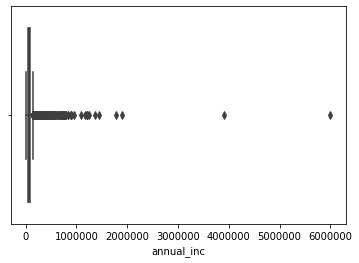

In [29]:
# Analyse the data for column 'annual_inc'
print(df_loan.annual_inc.describe())

# Analyse outliers for column 'annual_inc' using boxplot
sns.boxplot(df_loan['annual_inc'])

In [30]:
# Analyse the quantile data above 90% for column 'annual_inc'
df_loan.annual_inc.quantile([0.90, 0.95, 0.97,0.98, 0.99])

0.90    116738.90
0.95    142000.00
0.97    165996.12
0.98    188023.92
0.99    235000.00
Name: annual_inc, dtype: float64

Values above the 95th percentile in the `annual_inc` column will be removed to address extreme outliers and ensure a more accurate analysis.

In [31]:
df_perc95 = df_loan['annual_inc'].quantile(0.95)
df_loan = df_loan[df_loan.annual_inc <= df_perc95]

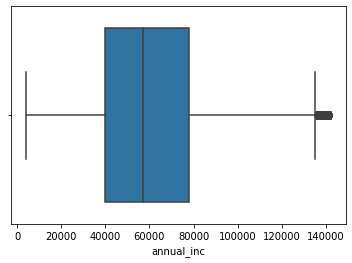

In [32]:
# Analyse outliers for column 'annual_inc' after removing 95 quantile.
sns.boxplot(df_loan['annual_inc'])

Analyze the `annual_inc` column using a boxplot after removing values above the 95th percentile to identify and visualize potential outliers and the distribution of income data.

count    34972.00000
mean        11.93821
std          3.67680
min          5.42000
25%          8.94000
50%         11.83000
75%         14.42000
max         24.40000
Name: int_rate, dtype: float64


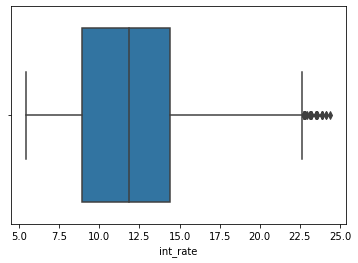

In [33]:
# Analyse the data for column 'int_rate'
print(df_loan.int_rate.describe())

# Analyse outliers for column 'int_rate'.
sns.boxplot(df_loan['int_rate'])

For the `int_rate` column, the boxplot shows the 100th percentile at 22.50% and the maximum value at 24.40%. The small difference indicates that the outliers have minimal impact, so there's no need to remove them.

**Observations from Interest Rate Column:**

Based on the two plots and the statistics for interest rates, we can conclude that most interest rates fall between 9.00% and 14.50%. However, some individuals secured loans at higher interest rates, up to 22.50%.

# Step: 3 - Data Analysis and Visualization.

In [34]:
# Let's take a look at the important variable, `Loan Status`, in the total loans issued.
print((df_loan.loan_status.value_counts()*100)/len(df_loan))

Fully Paid     85.505547
Charged Off    14.494453
Name: loan_status, dtype: float64


**Initial Observations on Loan Status:**
- 86% of loans were **fully paid**.
- Nearly 14% of loans were **charged off**.

In [35]:
# "Let's examine the important variable, `Purpose of Loan`, in the total loans issued.
(df_loan.purpose.value_counts()*100)/len(df_loan)

debt_consolidation    47.598078
credit_card           13.059019
other                  9.825003
home_improvement       6.962713
major_purchase         5.593046
small_business         4.394945
car                    3.954592
wedding                2.470548
medical                1.741393
moving                 1.475466
vacation               0.946471
house                  0.917877
educational            0.812078
renewable_energy       0.248770
Name: purpose, dtype: float64

**Initial Observations on Loan Purpose:**
- The majority of loans were taken for **debt consolidation (47%)** and **credit card bill payments (13%)**.
- **Other (10%)** is also a significant category where loans were issued.

### Correlation Matrix - Quantitative Variables

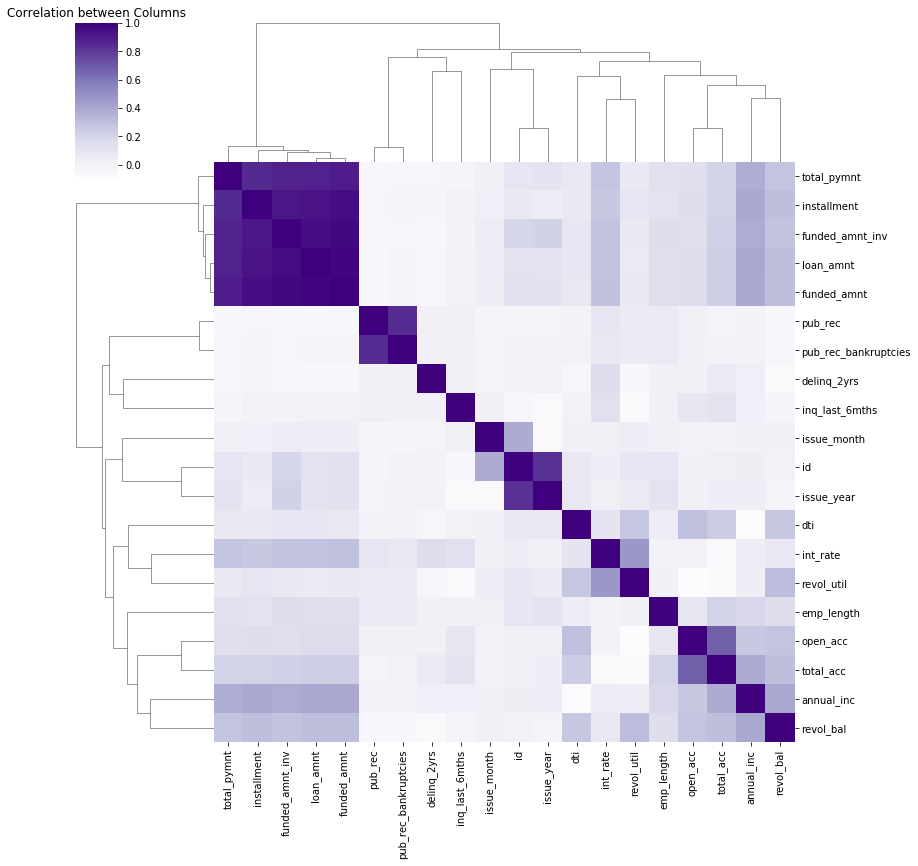

In [36]:
sns.clustermap(data=df_loan.corr(), cmap='Purples', figsize=(12,12))
plt.title("Correlation between Columns")
plt.show()

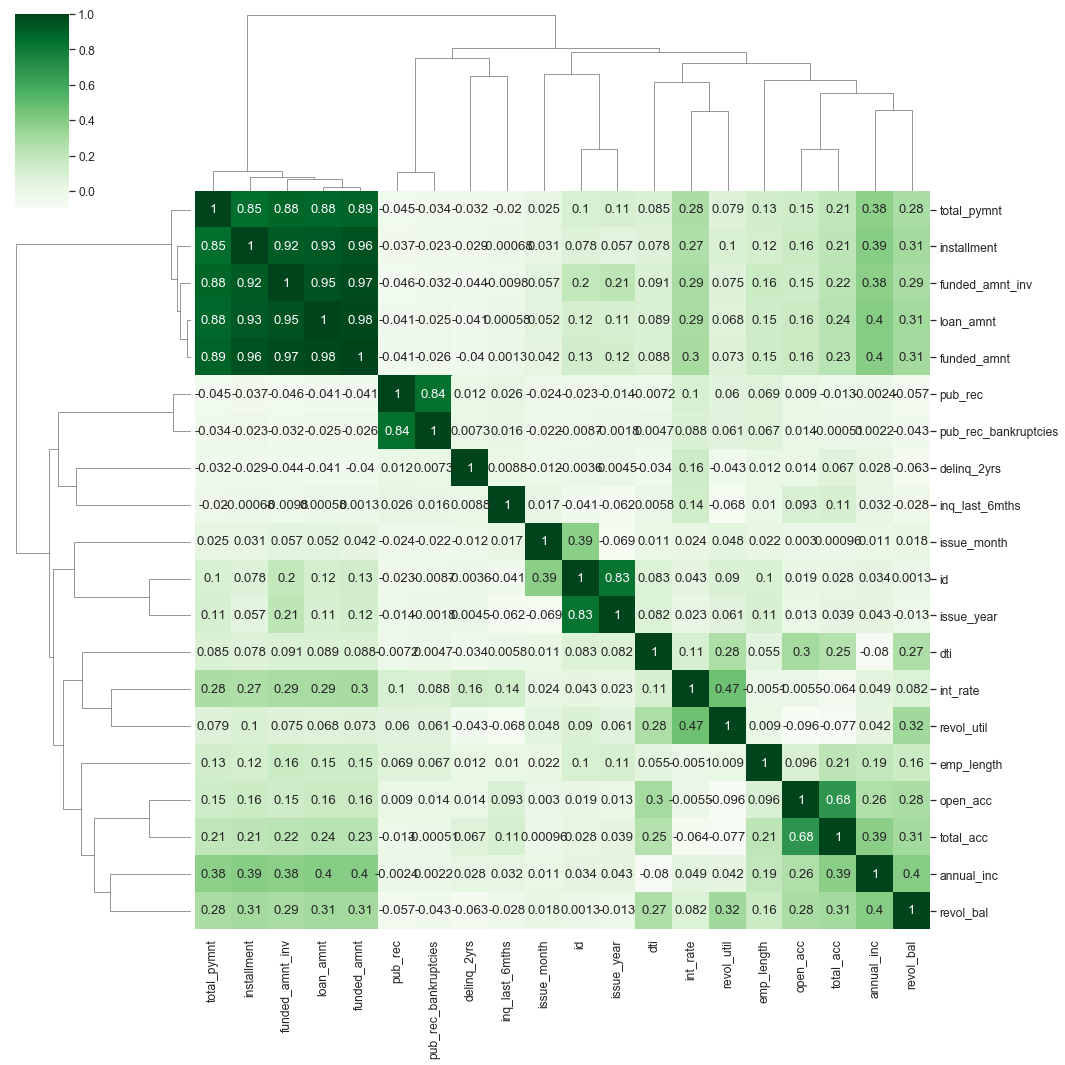

In [37]:
# Bivariate Analysis - Correlation Matrix: Quantitative Variables
# We'll use a heatmap with a dendrogram (clustermap) to visualize the correlation among numerical variables. 

loan_correlation = df_loan.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(15, 15),cmap="Greens")
plt.show()

**Initial Observations on closeness and relationships between variables:**

As we know, darker values indicate higher correlation. It is evident that `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `installment`, and `total_pymnt` are highly correlated. These fields are proportional to each other, showing strong relationships. 

Additionally, fields related to public records, such as `pub_rec` and `pub_rec_bankruptcies`, as well as fields related to the number of accounts, like `open_acc` and `total_acc`, also exhibit significant correlation. This suggests that these variables are closely connected and may influence each other within the dataset.

## Univariate Analysis

Univariate analysis refers to the examination of a single variable within a dataset to understand its distribution, central tendency, and variability. This type of analysis is fundamental in statistical analysis as it helps identify the basic characteristics of the data, such as mean, median, mode, range, variance, and standard deviation. Through visualizations like histograms, box plots, and bar charts, univariate analysis reveals patterns, trends, and potential outliers within the data. It also serves as a preliminary step before conducting more complex analyses, allowing researchers to gain insights into the data's structure and behavior.

**Creating Function :: plot_custom_boxplot()**

The `plot_custom_boxplot` function generates a customized box plot for a specified column in a DataFrame. It handles horizontal or vertical orientation with distinct color palettes, includes error handling for invalid columns, and allows optional titles. The function offers flexible and clear visualization with enhanced readability and customization.

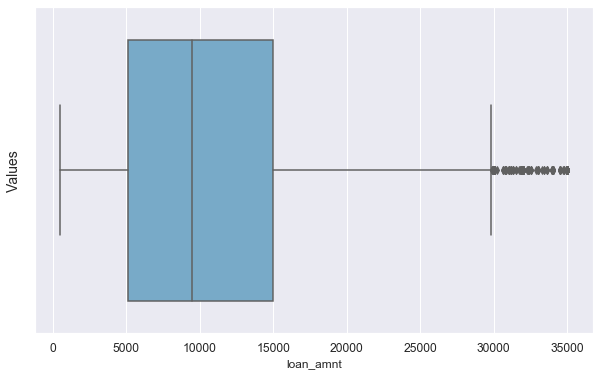

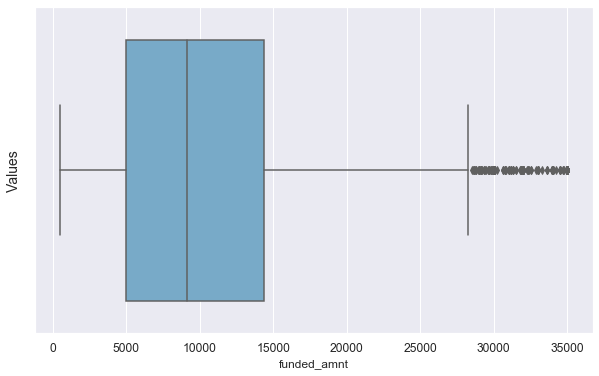

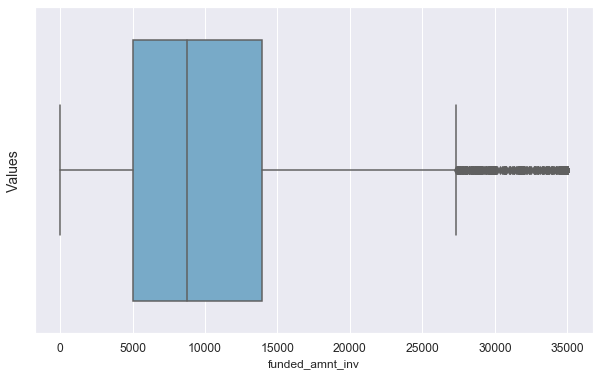

In [38]:
# Function to create a blox plot chart with customization
def plot_custom_boxplot(dataframe: pd.DataFrame, col_name: str, plot_title: str = None, horizontal_plot: bool = True) -> None:
    """
    Plots a customized box plot for a specified column in a DataFrame.

    Parameters:
    dataframe (pd.DataFrame): DataFrame containing the data.
    col_name (str): Column to be plotted.
    plot_title (str, optional): Title of the plot. Default is None.
    horizontal_plot (bool): If True, plots horizontally; otherwise, plots vertically. Default is True.

    Returns:
    None
    """

    if col_name not in dataframe.columns:
        raise ValueError(f"Column '{col_name}' is not present in the DataFrame.")
    
    plt.figure(figsize=(10, 6))
    axis = sns.boxplot(x=dataframe[col_name], palette='Blues') if horizontal_plot else sns.boxplot(y=dataframe[col_name], palette='Oranges')
    
    if plot_title:
        axis.set_title(plot_title, fontsize=14)

    axis.set_xlabel(col_name, fontsize=12 if horizontal_plot else 14)
    axis.set_ylabel('Values', fontsize=12 if not horizontal_plot else 14)
    
    plt.show()
# End of the Function

# Visualizing via Example for the above function.
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']:
    plot_custom_boxplot(df_loan, col, horizontal_plot=True)

count    34972.000000
mean     10778.632906
std       7067.550179
min        500.000000
25%       5125.000000
50%       9500.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


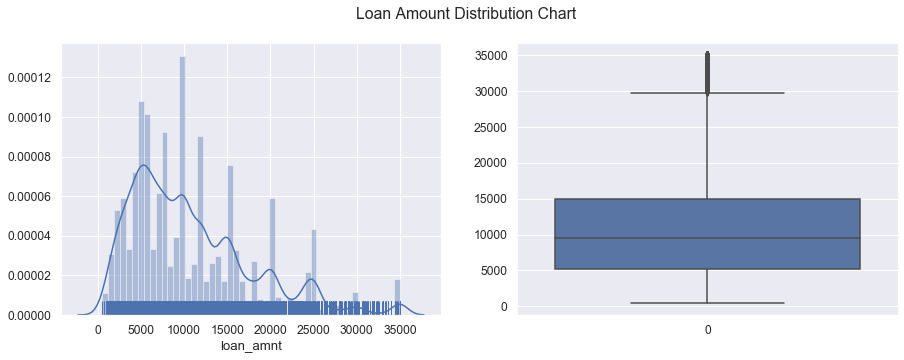

In [39]:
print(df_loan.loan_amnt.describe())

# Visualizing the Loan Amount Dataset
plt.figure(figsize=(15,5))

# Creating Histogram plot
plt.subplot(1,2,1)
sns.distplot(a=df_loan.loan_amnt, rug=True)

# Creating Box plot
plt.subplot(1,2,2)
sns.boxplot(data=df_loan.loan_amnt)

# Add title for subplots and show the chart.
plt.suptitle('Loan Amount Distribution Chart')
plt.show()

**Observations from the Loan Amount Column:**

From the plots above, we can see that a significant number of people took out loans of 9,500, which is also the median of the distribution. Very few individuals took out loans exceeding 30,000.

The correlation matrix reveals that `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `installment`, and `total_pymnt` are highly correlated, indicating that these variables are proportional to one another and exhibit strong relationships.

count    34972.000000
mean        13.505695
std          6.640919
min          0.000000
25%          8.420000
50%         13.640000
75%         18.750000
max         29.990000
Name: dti, dtype: float64


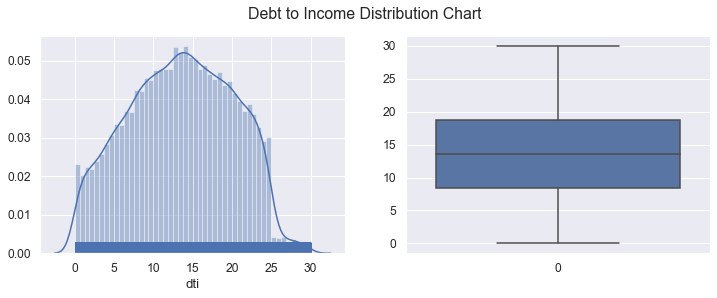

In [40]:
print(df_loan.dti.describe())

# Visualizing the Loan Amount Dataset
plt.figure(figsize=(12,4))

# Creating Histogram plot
plt.subplot(1,2,1)
sns.distplot(a=df_loan.dti, rug=True)

# Creating Box plot
plt.subplot(1,2,2)
sns.boxplot(data=df_loan.dti)

# Add title for subplots and show the chart.
plt.suptitle('Debt to Income Distribution Chart')
plt.show()

A ratio is calculated by dividing the borrower’s total monthly debt payments (excluding mortgage and the requested LC loan) by their self-reported monthly income.

**Observations from the DTI Column:**

The distribution of the Debt-to-Income (DTI) ratio appears to be normal, with no significant outliers. This suggests that the loans are primarily given to borrowers with a Debt-to-Income ratio of less than 30%, which is a positive indicator.

**Create Function :: plot_prob_distribution()**

The plot_prob_distribution function visualizes the probability distribution of two categorical variables side by side using subplots. It calculates and displays the proportions of each value in the specified columns, with distinct color palettes for each plot. This approach enhances comparison and readability in data analysis.

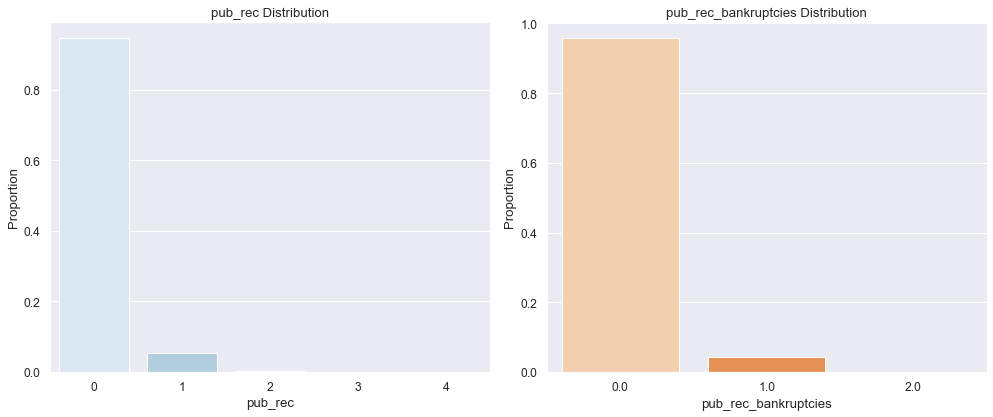

In [41]:
# Function to plot the probability distribution of a categorical variable
def plot_prob_distribution(df: pd.DataFrame, column1: str, column2: str) -> None:
    """
    Plots the probability distribution of two categorical variables side by side.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    column1 (str): First column to plot.
    column2 (str): Second column to plot.

    Returns:
    None
    """

    # Calculate probability/percentage of each value in the first column
    prob_df1 = df[column1].value_counts(normalize=True).reset_index()
    prob_df1.columns = [column1, 'Proportion']

    # Calculate probability/percentage of each value in the second column
    prob_df2 = df[column2].value_counts(normalize=True).reset_index()
    prob_df2.columns = [column2, 'Proportion']

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot the first column
    sns.barplot(x=column1, y='Proportion', data=prob_df1, ax=axes[0], palette='Blues')
    axes[0].set_xlabel(column1)
    axes[0].set_ylabel('Proportion')
    axes[0].set_title(f'{column1} Distribution')

    # Plot the second column
    sns.barplot(x=column2, y='Proportion', data=prob_df2, ax=axes[1], palette='Oranges')
    axes[1].set_xlabel(column2)
    axes[1].set_ylabel('Proportion')
    axes[1].set_title(f'{column2} Distribution')

    # Adjust layout
    plt.tight_layout()
    plt.show()
# End of Function
    
# Visualizing via Example for the above function.
plot_prob_distribution(df_loan, 'pub_rec', 'pub_rec_bankruptcies')

**Observations on Public Record Columns:**

- From the `pub_rec` column, we observe that around 90% of borrowers have no public derogatory records.
- The `pub_rec_bankruptcies` column shows that 99% of individuals have not declared bankruptcy.

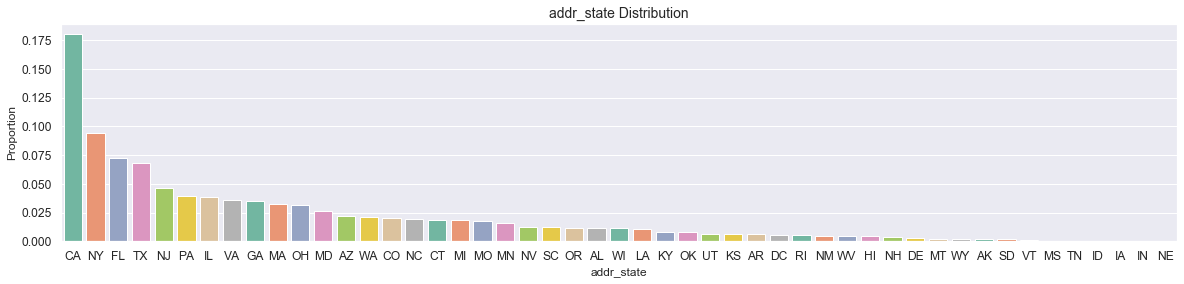

In [42]:
# Set up the plot size
plt.figure(figsize=(20, 4))

# Define the variable and compute probabilities
variable = 'addr_state'
prob_df = df_loan[variable].value_counts(normalize=True).reset_index()

# Create a bar plot with updated color palette
sns.barplot(x='index', y=variable, data=prob_df, palette="Set2")

# Customize labels and title
plt.xlabel(variable, fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.title(f'{variable} Distribution', fontsize=14)

# Display the plot
plt.show()

**Observations on the `addr_state` column:** 

- It reveal that the majority of borrowers are from California (CA) and New York (NY), with Florida (FL) and Texas (TX) following.

### Segmented Univariate Analysis

Segmented Univariate Analysis involves examining the distribution of a single variable within distinct segments or groups of data. This approach allows for a deeper understanding of how the variable behaves across different categories, such as age groups, income levels, or customer segments. By segmenting the data, analysts can identify patterns, trends, and outliers that may not be apparent in the overall dataset. This method is particularly useful in identifying specific areas where targeted strategies can be applied, such as in marketing, risk management, or customer service, to optimize outcomes based on the unique characteristics of each segment.

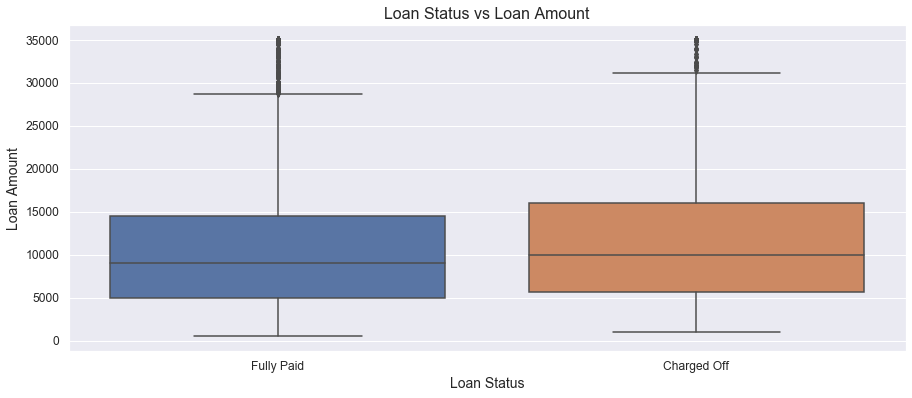

In [43]:
# Create a boxplot with percentiles and values annotated inside the chart
plt.figure(figsize=(15, 6))

# Create the boxplot
ax = sns.boxplot(x='loan_status', y='loan_amnt', data=df_loan)

# Add title and labels
plt.title('Loan Status vs Loan Amount', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)

# Show the plot
plt.show()

**Observations from `loan_status` and `loan_amnt` columns:**

Charged Off loans generally have higher amounts compared to Fully Paid loans. This indicates a trend where larger loan amounts are more likely to default.

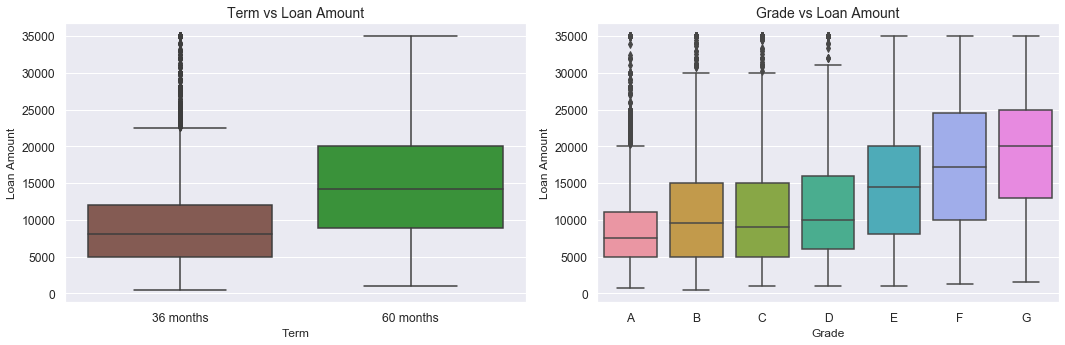

In [44]:
# Set a new color palette for the plots
custom_colors = ["#8c564b", "#2ca02c"]  # Soft brown and green for a modern look
sns.set_palette(sns.color_palette(custom_colors))

# Create the figure and subplots
plt.figure(figsize=(15, 5))

# Subplot 1: Term vs Loan Amount
plt.subplot(1, 2, 1)
sns.boxplot(x='term', y='loan_amnt', data=df_loan)
plt.title('Term vs Loan Amount', fontsize=14)
plt.xlabel('Term', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)

# Subplot 2: Grade vs Loan Amount
plt.subplot(1, 2, 2)
sns.boxplot(x='grade', y='loan_amnt', data=df_loan, order=sorted(df_loan.grade.unique()))
plt.title('Grade vs Loan Amount', fontsize=14)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)

# Show the plots
plt.tight_layout()

**Observations from the columns `term`, `grade`, and `loan_amnt`:**

- Loans with higher amounts tend to have longer tenures, specifically 60 months. 
- Borrowers with grades 'F' and 'G' have taken the maximum loan amounts. Additionally, as the grade moves from A to G, the loan amount generally increases.

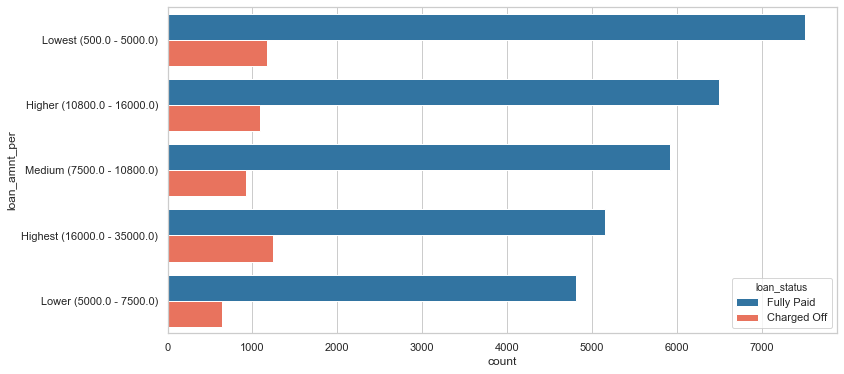

loan_amnt_per,Charged off %,Record count
Highest (16000.0 - 35000.0),0.193649,6393
Higher (10800.0 - 16000.0),0.143309,7585
Medium (7500.0 - 10800.0),0.135163,6851
Lowest (500.0 - 5000.0),0.134998,8689
Lower (5000.0 - 7500.0),0.118262,5454


In [45]:
# Global settings/constants for plot aesthetics and categorical grouping
color_palette = ["#1f77b4", "#ff6347"]  # Blue and Orange color palette for better visualization
sns.set(style='whitegrid', palette=sns.color_palette(color_palette))

# Grouping and ordering for categorical data analysis
by = 'loan_status'  # Column name for loan status
order = ['Fully Paid', 'Charged Off']  # Order of categories for consistent plotting

# ----------------------------------------------------------
# Function to create 5 bins for the mentioned column
def create_percentile_bins(*, df=df_loan, col_name, suffix=''):
    """
    Bins a continuous numeric column into percentiles and creates a new column with categories.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data. Defaults to 'loan'.
        col_name (str): The numeric column to be binned into percentiles.
        suffix (str): Optional suffix to append to the percentile values (e.g., '%' for interest rates). Defaults to an empty string.

    Returns:
        None
        A new column is created in the DataFrame with a '_per' suffix, containing the categorized percentiles.
    """
    
    # New column name based on the original column
    new_col_name = f"{col_name}_per"

    # Define base labels for percentiles
    percentile_labels = ['Lowest', 'Lower', 'Medium', 'Higher', 'Highest']

    # Generate detailed labels with percentile ranges
    percentile_labels = [
        f"{percentile_labels[p]} ({round(np.nanpercentile(df[col_name], p * 20), 2)}{suffix} - "
        f"{round(np.nanpercentile(df[col_name], (p + 1) * 20), 2)}{suffix})"
        for p in range(5)
    ]

    # Creating the percentile bins
    df[new_col_name] = pd.qcut(df[col_name], q=5, labels=percentile_labels)
# End of the function    
# ----------------------------------------------------------
# Function to plot comparison chart for the mentioned column
def plot_univariate_categorical(*, df=df_loan, col_name, plot_title=None, plot_size=(12, 6), group_compare=True, 
                                show_boxplot=False, pct_compare=False, filter_cond=None, filter_desc=None):
    """
    Plots univariate analysis for a categorical column, with options for group comparison, percentage comparison, and filtering.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data. Defaults to 'loan'.
        col_name (str): The categorical column to be analyzed.
        plot_title (str, optional): Title for the plot. Defaults to None.
        plot_size (tuple, optional): Size of the plot. Defaults to (8, 6).
        group_compare (bool, optional): If True, compares groups based on the categorical column. Defaults to True.
        show_boxplot (bool, optional): If True, displays a box plot of the data. Defaults to False.
        pct_compare (bool, optional): If True, performs percentage comparison using the `Pct_Comparison` function. Defaults to False.
        filter_cond (str, optional): Condition to filter the data before plotting. Ignored if None. Defaults to None.
        filter_desc (str, optional): Description of the filter condition for display purposes. Valid if filter_cond is not None. Defaults to None.

    Returns:
        None: Displays a count plot and, optionally, a box plot.
    """
    
    # Apply filtering if a condition is provided
    plot_data = df if filter_cond is None else df.loc[filter_cond]

    # Perform percentage comparison if enabled
    if pct_compare and filter_cond is not None:
        Pct_Comparison(filter_cond, filter_desc)

    # Group comparison: count plot and summary table
    if group_compare:
        fig, ax = plt.subplots(figsize=plot_size)
        sns.countplot(data=plot_data, y=col_name, hue=by, ax=ax, 
                      order=plot_data[col_name].value_counts().index, hue_order=order)
        if plot_title:
            ax.set_title(plot_title)
        plt.show()

        # Generate summary table for group comparison
        summary_df = (df.groupby([col_name])[by]
                      .value_counts(normalize=True)
                      .rename('Charged off %')
                      .reset_index()
                      .sort_values(col_name))
        summary_df = (summary_df[summary_df[by] == 'Charged Off']
                      .sort_values(by='Charged off %', ascending=False)
                      .drop(columns=[by]))
        count_df = df.groupby([col_name])[by].count().reset_index(name='Record count')
        summary_df = summary_df.merge(count_df, on=col_name)
        html_table = summary_df.to_html(index=False)
        centered_html = f"<div style='display: flex; justify-content: center;'>{html_table}</div>"
        display(HTML(centered_html))

        # Optional: Display box plot
        if show_boxplot:
            count_df.plot(kind='box', logy=True, title="No. of Records of Defaulted Loans per Category")
            plt.show()
# End of the function

# Visualizing via Example for the above function.
create_percentile_bins(col_name='loan_amnt')
plot_univariate_categorical(col_name='loan_amnt_per')

**Observations on Loan Amount Columns:**

Larger loan amounts increase the likelihood of default. This trend indicates that borrowers with higher loan balances face greater risks of failing to repay, suggesting a direct correlation between the size of the loan and the probability of defaulting.

Based on the Correlation Matrix for quantitative variables, darker colors signify stronger correlations. It’s clear that the variables `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `installment`, and `total_pymnt` exhibit high correlations with each other. These variables show strong proportional relationships, similar to the `loan_amnt` column.

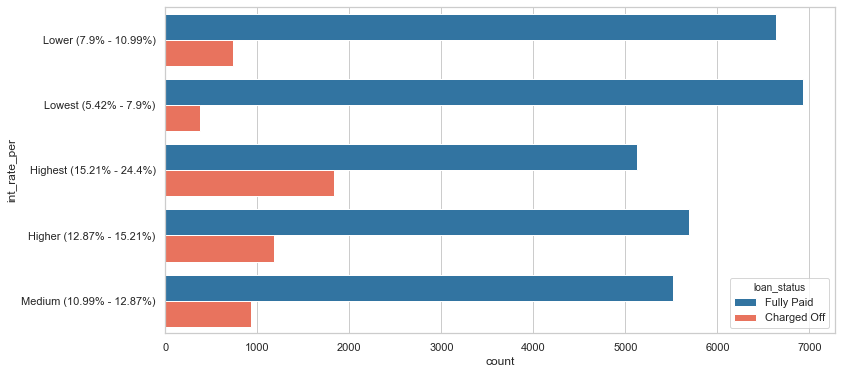

int_rate_per,Charged off %,Record count
Highest (15.21% - 24.4%),0.263362,6960
Higher (12.87% - 15.21%),0.171786,6869
Medium (10.99% - 12.87%),0.144937,6458
Lower (7.9% - 10.99%),0.100325,7376
Lowest (5.42% - 7.9%),0.051991,7309


In [46]:
create_percentile_bins(col_name='int_rate', suffix='%')
plot_univariate_categorical(col_name='int_rate_per')

**Observations for Rate of Interest Columns:**

The column `int_rate` reveals that higher interest rates are associated with a higher percentage of charged-off loans. 

According to the Correlation Matrix for quantitative variables, darker colors indicate stronger correlations. It is evident that `int_rate` and `revol_util` (Revolving line utilization rate, which measures the amount of credit a borrower is using relative to their total available revolving credit) are highly correlated. These variables exhibit a strong proportional relationship with each other.

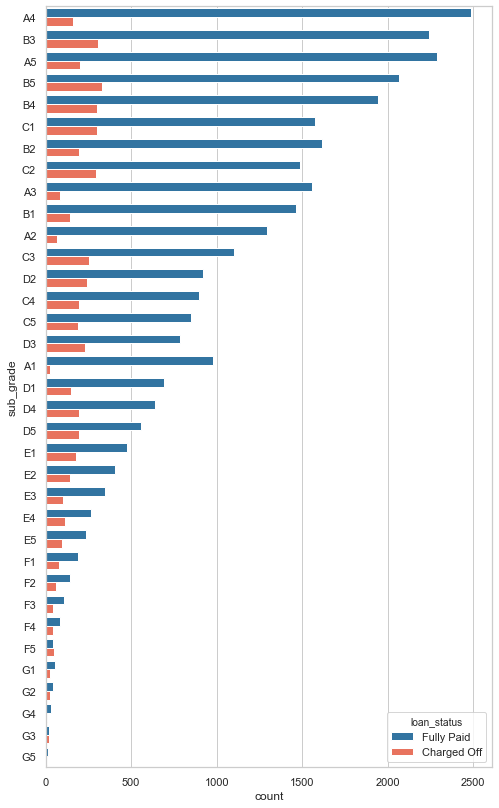

sub_grade,Charged off %,Record count
F5,0.510638,94
G3,0.463415,41
G5,0.428571,21
G2,0.378788,66
F4,0.340909,132
G1,0.329412,85
F2,0.302439,205
E4,0.298153,379
F3,0.289474,152
F1,0.286245,269


In [47]:
plot_univariate_categorical(col_name='sub_grade', plot_size=(8,14))

**Observations from the columns `sub_grade`:**

The table highlights the relationship between loan sub-grades and default percentages, with sub-grades F5, G3 and G5 exhibiting default rates above 40%. This indicates that the loan sub-grade is a strong predictor of the likelihood of default, making it a critical factor in assessing risk.

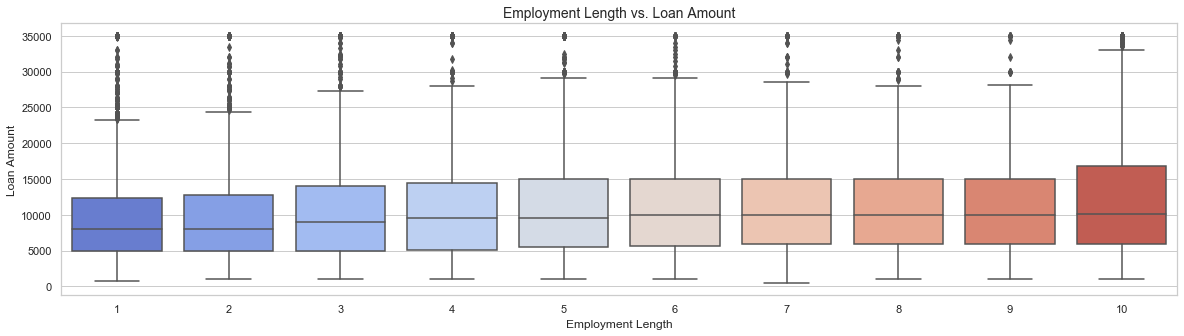

In [48]:
# Set up the plot size
plt.figure(figsize=(20, 5))

# Create a boxplot for 'emp_length' vs. 'loan_amnt' with a new color palette
sns.boxplot(x='emp_length', y='loan_amnt', data=df_loan, palette="coolwarm")
plt.title('Employment Length vs. Loan Amount', fontsize=14)
plt.xlabel('Employment Length', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)
plt.show()

**Observation from the `emp_length` and `loan_amnt` columns:**

- The majority of borrowers have over 10 years of employment, while the fewest have less than 1 year. 
- Although there's not much to infer from this data, it is evident that borrowers with no employment are more likely to default on their loans.

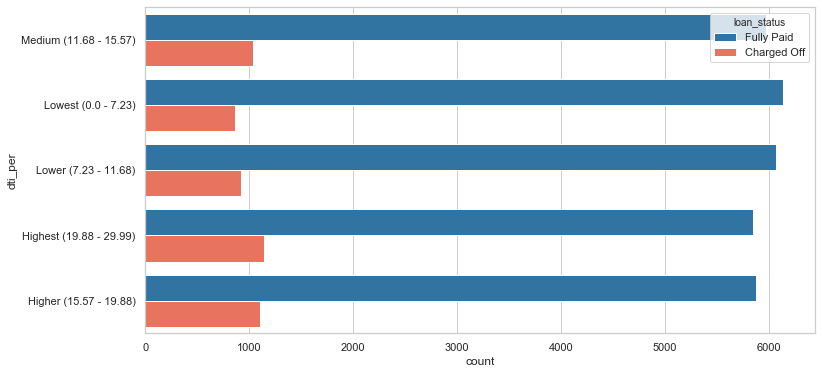

dti_per,Charged off %,Record count
Highest (19.88 - 29.99),0.163709,6988
Higher (15.57 - 19.88),0.158219,6984
Medium (11.68 - 15.57),0.147361,7010
Lower (7.23 - 11.68),0.132046,6990
Lowest (0.0 - 7.23),0.123429,7000


In [49]:
create_percentile_bins(col_name='dti')
plot_univariate_categorical(col_name='dti_per')

**Observation from the `dti` column:**

- A higher Debt-to-Income (DTI) ratio is associated with an increased percentage of charged-off loans. 
- This suggests that as borrowers take on more debt relative to their income, the likelihood of defaulting on their loans rises, indicating that DTI is a key risk factor in assessing loan repayment ability.

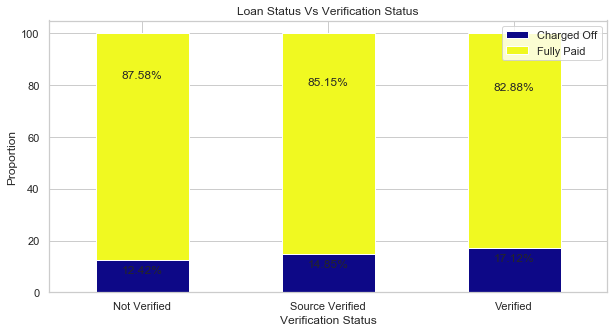

In [50]:
# Group by 'verification_status' and calculate proportions of 'loan_status'
plots = df_loan.groupby('verification_status')['loan_status'].value_counts().unstack() \
    .apply(lambda x: x * 100 / x.sum(), axis=1) \
    .plot(kind='bar', stacked=True, figsize=(10, 5), colormap='plasma')

# Annotate the bars with percentage values
for bar in plots.patches:
    height = bar.get_height()
    plots.annotate(f'{height:.2f}%', 
                   (bar.get_x() + bar.get_width() / 2, height), 
                   ha='center', va='center',
                   size=12, xytext=(0, -10), 
                   textcoords='offset points')

# Customize plot
plt.xticks(rotation=0)
plt.ylabel("Proportion")
plt.xlabel('Verification Status')
plt.title("Loan Status Vs Verification Status")
plt.legend(loc='upper right')
plt.show()

**Observation on verification_status and loan_status column:**

Interestingly, the data reveals that verified applicants have a higher percentage of defaults, suggesting potential issues with the verification process. Surprisingly, borrowers with unverified income sources are more likely to fully repay their loans, whereas those with verified incomes are more prone to defaults. 

This unexpected trend raises concerns about the effectiveness of the verification process and suggests that it may not be accurately assessing loan repayment risk.

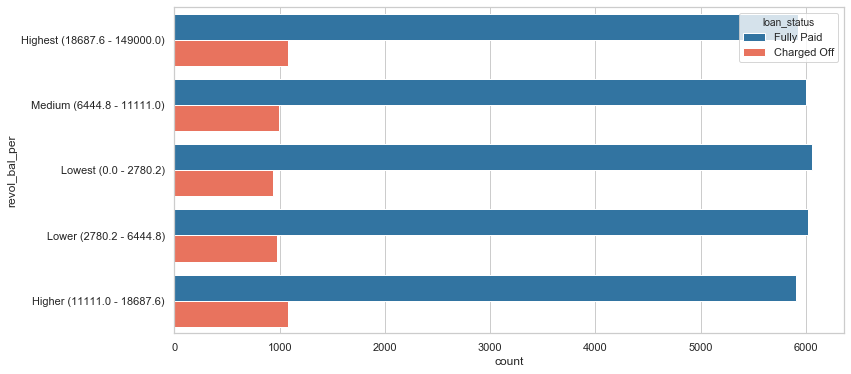

revol_bal_per,Charged off %,Record count
Higher (11111.0 - 18687.6),0.155012,6993
Highest (18687.6 - 149000.0),0.153824,6995
Medium (6444.8 - 11111.0),0.142530,6995
Lower (2780.2 - 6444.8),0.139262,6994
Lowest (0.0 - 2780.2),0.134096,6995


In [51]:
create_percentile_bins(col_name='revol_bal')
plot_univariate_categorical(col_name='revol_bal_per')

**Observation from the `revol_bal` column:** 

- The total credit revolving balance has a moderate impact on the default rate. 
- As the revolving balance increases, the likelihood of a loan default also rises. Higher balances indicate a greater risk of default, highlighting the importance of managing revolving credit effectively.

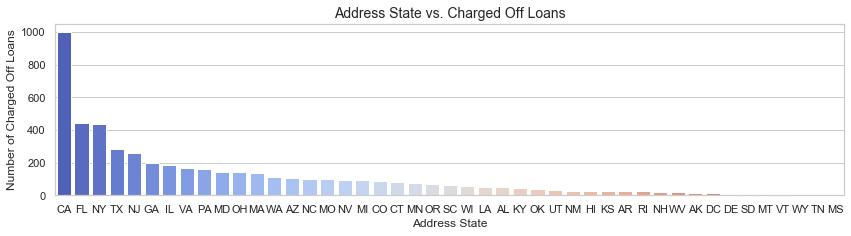

In [52]:
# Filter the data for charged off loans
charged_off_df = df_loan[df_loan['loan_status'] == 'Charged Off']

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot: Address State vs Charged Off
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df['addr_state'].value_counts().index, palette="coolwarm")
plt.title('Address State vs. Charged Off Loans', fontsize=14)
plt.xlabel('Address State', fontsize=12)
plt.ylabel('Number of Charged Off Loans', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

**Observation from the `loan_status` and `addr_state` columns:** 

- It reveals that the highest number of defaults occurred in CA, FL, and NY. Texas (TX) and New Jersey (NJ) followed. 
- This suggests that these states have higher default rates compared to others, highlighting regional variations in loan performance.

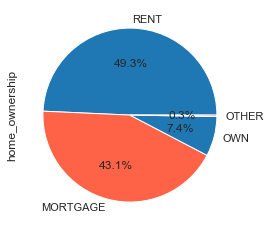

In [53]:
df_temp = df_loan[df_loan['home_ownership']!='NONE']
df_temp['home_ownership'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

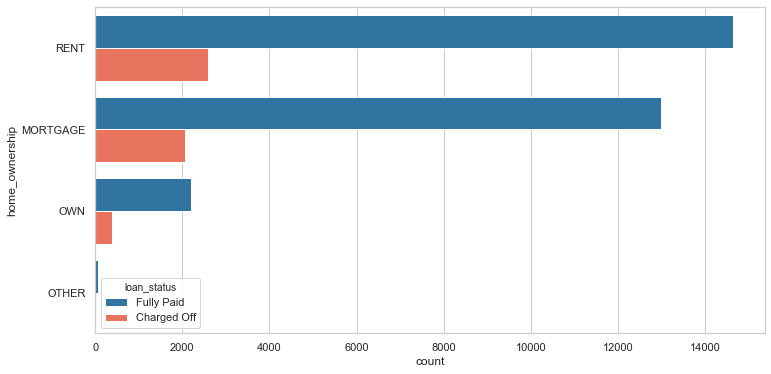

home_ownership,Charged off %,Record count
OTHER,0.186813,91
RENT,0.150963,17236
OWN,0.146172,2586
MORTGAGE,0.137592,15059


In [54]:
plot_univariate_categorical(col_name='home_ownership')

**Observations from the `home_ownership` column:** 

- It indicate limited information since a significant portion is labeled as "OTHER." 
- This ambiguity restricts our ability to draw meaningful conclusions about home ownership patterns and their impact on the data. Further clarification or additional categories might be needed to enhance the analysis.

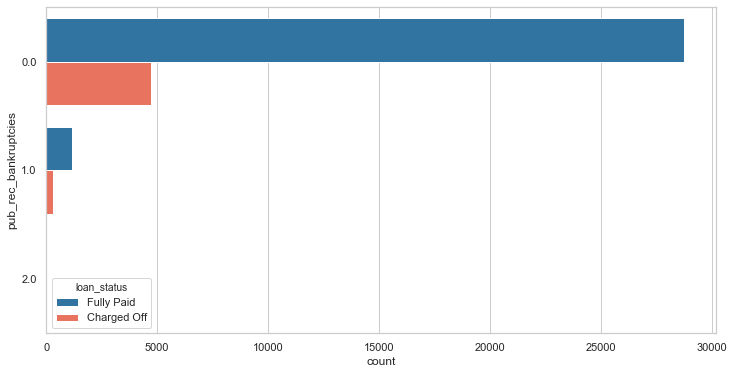

pub_rec_bankruptcies,Charged off %,Record count
2.0,0.400000,5
1.0,0.220884,1494
0.0,0.141517,33473


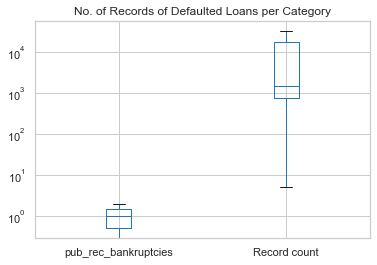

In [55]:
plot_univariate_categorical(col_name='pub_rec_bankruptcies', show_boxplot=True)

**Observation on the `pub_rec_bankruptcies` column:** 

- A higher number of public bankruptcy records is associated with an increased likelihood of loan default. 
- More bankruptcy records indicate a greater risk of defaulting on a loan, highlighting the importance of this variable in assessing loan risk.

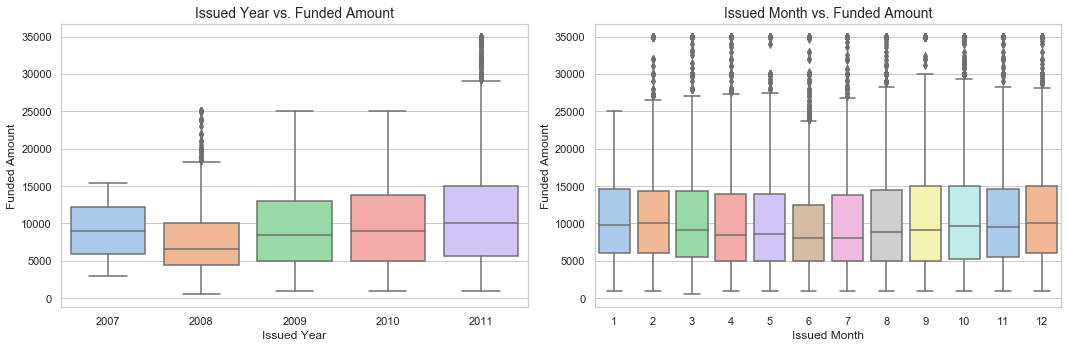

In [56]:
# Set up the plot size
plt.figure(figsize=(15, 5))

# Define color palettes for better visualization
color_palette = "pastel"

# Plot boxplot for 'issue_d_year' vs 'funded_amnt'
plt.subplot(121)
sns.boxplot(x=df_loan.issue_year, y=df_loan.funded_amnt, data=df_loan, palette=color_palette)
plt.title('Issued Year vs. Funded Amount', fontsize=14)
plt.xlabel('Issued Year', fontsize=12)
plt.ylabel('Funded Amount', fontsize=12)

# Plot boxplot for 'issue_d_month' vs 'funded_amnt'
plt.subplot(122)
sns.boxplot(x=df_loan.issue_month, y=df_loan.funded_amnt, data=df_loan, palette=color_palette)
plt.title('Issued Month vs. Funded Amount', fontsize=14)
plt.xlabel('Issued Month', fontsize=12)
plt.ylabel('Funded Amount', fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()

**Observation on the `issue_year`, `issue_month`, and `funded_amnt` columns:** 

- December stands out as the month with the highest number of loan applications each year, possibly due to increased borrowing for travel or holiday expenses. This trend suggests that borrowers may struggle to repay loans taken during the festive season. 
- Additionally, 2011 year recorded the highest funded amount, indicating a peak in loan disbursements that year. This information highlights seasonal borrowing patterns and significant fluctuations in funding amounts over time.

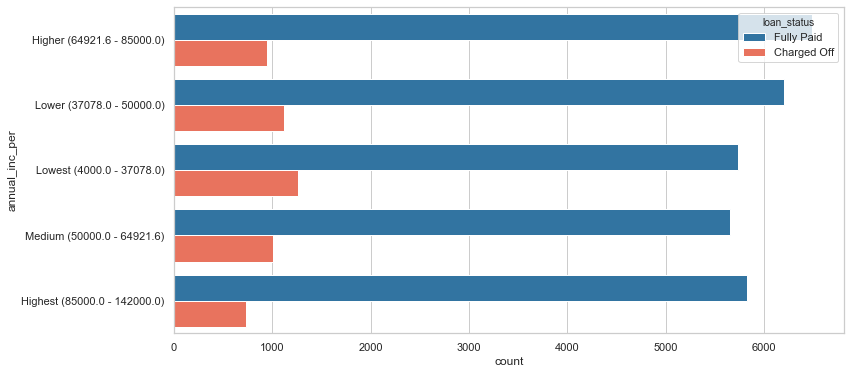

annual_inc_per,Charged off %,Record count
Lowest (4000.0 - 37078.0),0.179700,6995
Lower (37078.0 - 50000.0),0.152996,7327
Medium (50000.0 - 64921.6),0.151479,6661
Higher (64921.6 - 85000.0),0.127926,7434
Highest (85000.0 - 142000.0),0.111518,6555


In [57]:
create_percentile_bins(col_name='annual_inc')
plot_univariate_categorical(col_name='annual_inc_per')

**Observation from the `annual_inc_per` column:** 

- Higher income levels are associated with a higher repayment percentage, indicating more reliable repayments. Conversely, lower income levels correlate with a higher likelihood of defaulting on loans. 
- This suggests that income plays a significant role in loan repayment behavior, with greater income reducing the risk of default.

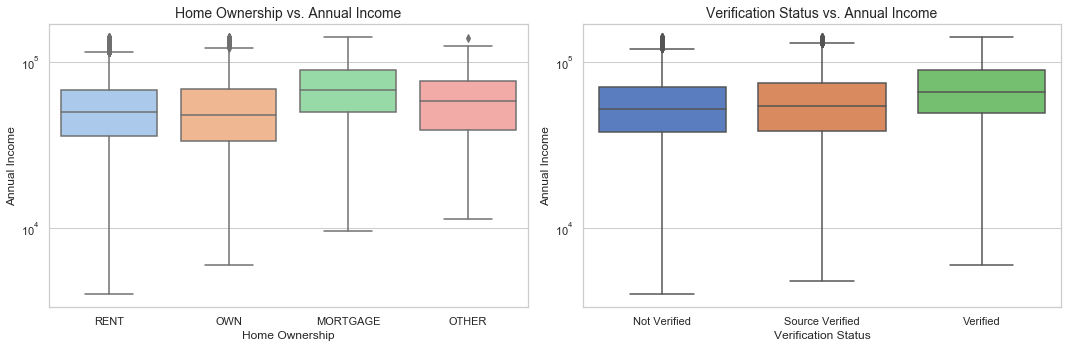

In [58]:
# Set up the figure and subplots
plt.figure(figsize=(15, 5))

# Plot 1: Home Ownership vs Annual Income
plt.subplot(121)
sns.boxplot(x='home_ownership', y='annual_inc', data=df_loan, palette="pastel")
plt.title('Home Ownership vs. Annual Income', fontsize=14)
plt.yscale('log')
plt.xlabel('Home Ownership', fontsize=12)
plt.ylabel('Annual Income', fontsize=12)

# Plot 2: Verification Status vs Annual Income
plt.subplot(122)
verification_status_order = sorted(df_loan.verification_status.unique())
sns.boxplot(x='verification_status', y='annual_inc', order=verification_status_order, data=df_loan, palette="muted")
plt.title('Verification Status vs. Annual Income', fontsize=14)
plt.yscale('log')
plt.xlabel('Verification Status', fontsize=12)
plt.ylabel('Annual Income', fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()

**Observations from the `home_ownership`, `verification_status`, and `annual_inc` columns:** 

- It reveal that individuals with a mortgage generally have higher annual incomes compared to other home ownership statuses. Additionally, borrowers with higher annual incomes tend to have verified income sources. 
- This suggests that higher-income borrowers are more likely to have their income verified, and those with mortgages exhibit greater income levels. These insights underscore the relationship between home ownership status, income verification, and income levels.

## Bivariate Analysis

Bivariate analysis examines the relationship between two variables to uncover patterns, correlations, or dependencies. This analysis helps to understand how one variable affects or is associated with another. Common methods include scatter plots, correlation coefficients, and cross-tabulations. By visualizing or quantifying these relationships, bivariate analysis can reveal trends, test hypotheses, and identify potential causative factors. It’s crucial for exploring interactions between variables and for making data-driven decisions or predictions. This analysis is foundational in fields such as statistics, data science, and research, offering insights into the interplay between different aspects of data.

Having analyzed the impact of individual variables on loan status, the next step is to evaluate the combined effect of groups of variables on loan status. These groups are defined based on our business insights. We'll compare the overall trend from the original distribution column with the trend observed after applying our specific conditions. This comparison will help us understand the collective influence of these variable groups on loan outcomes.

In [59]:
# Convert the loan_status column to a numeric variable: assign 1 for defaulted loans and 0 for loans that are paid off
df_loan['loan_status_num'] = df_loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
df_loan['loan_status_num'].describe()

count    34972.000000
mean         0.144945
std          0.352050
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status_num, dtype: float64

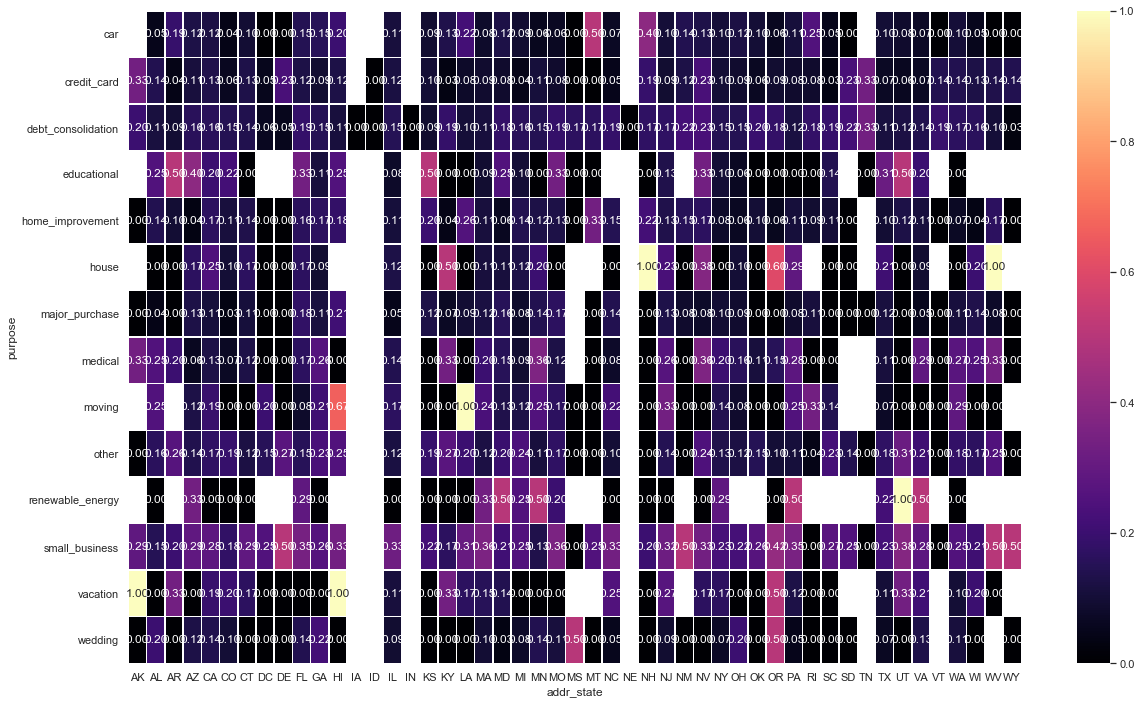

In [60]:
# Function to plot bivariate analysis chart for the mentioned column
def bivariate_analysis(*, data=df_loan, x, y, title=None, figsize=(8, 6), hue=None, hue_order=None):
    """
    Parameters:
        data (pd.DataFrame): The DataFrame containing the data.
        x (str): The name of the categorical column to be plotted on the x-axis.
        y (str): The name of the numerical column to be plotted on the y-axis.
        title (str, optional): The title of the plot. Default is None.
        figsize (tuple, optional): The size of the figure. Default is (8, 6).
        hue (str, optional): The name of the column for grouping. Default is None.
        hue_order (list, optional): The order of the hue categories. Default is None.
    
    Returns:
        None: Displays a violin plot.
    """
    fig, ax = plt.subplots(figsize=figsize)
    sns.violinplot(data=data, x=x, y=y, hue=hue, split=True, ax=ax, hue_order=hue_order, palette="RdYlGn")
    
    if title:
        plt.title(title, fontsize=14)
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    
    plt.show()
# End of the function    
# ----------------------------------------------------------
# Function to plot bivariate categorical chart for the mentioned column
def bivariate_categorical(*, data=df_loan, x, y, title=None, figsize=(8, 6)):
    """
    Parameters:
        data (pd.DataFrame): The DataFrame containing the data.
        x (str): The name of the first categorical column to be plotted on the columns axis.
        y (str): The name of the second categorical column to be plotted on the rows axis.
        title (str, optional): The title of the plot. Default is None.
        figsize (tuple, optional): The size of the figure. Default is (8, 6).
    
    Returns:
        None: Displays a heatmap plot.
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    # Create a pivot table for the heatmap
    pt = pd.pivot_table(data=data, values='loan_status_num', index=y, columns=x, aggfunc='mean')
    
    # Create a heatmap with a new color palette
    sns.heatmap(pt, ax=ax, cmap="magma", annot=True, fmt=".2f", linewidths=0.5)
    
    if title:
        plt.title(title, fontsize=14)
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    
    plt.show()
# End of the function

# Visualizing via Example for the above function.
bivariate_categorical(x='addr_state', y='purpose', figsize=(20,12))

**Observations on the `addr_state` and `purpose` Columns:**

The darker intersections in the plot between the addr_state and purpose columns indicate higher risks associated with loan applications. Below are some key observations:

- **Vacation Loans:** Higher risk is observed in states such as Alaska (AK), Hawaii (HI), and Oregon (OR).
- **Education Loans:** Elevated risk is noted in Arkansas (AR), Kansas (KS), and Utah (UT).
- **Small Business Loans:** Delaware (DE), New Mexico (NM), West Virginia (WV), and Wyoming (WY) show higher risks for small business loans.
- **Wedding Loans:** Increased risk is observed in Mississippi (MS) and Oregon (OR).

These points highlight specific combinations of loan purposes and states where loan applications may carry higher risks, as indicated by the darker areas in the heatmap.

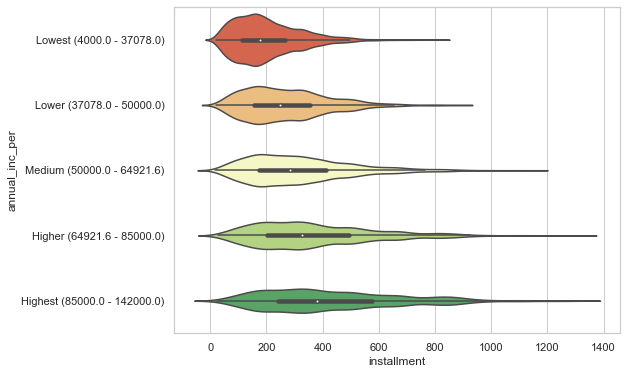

In [61]:
bivariate_analysis(x='installment', y='annual_inc_per')

**Observation on the `annual_inc_per` and `installment` columns:** 

- The figure indicates that higher installment amounts correlate with a greater number of defaults across all income groups. 
- This suggests that as the installment payments increase, the likelihood of loan defaults also rises, regardless of the borrower's income level.

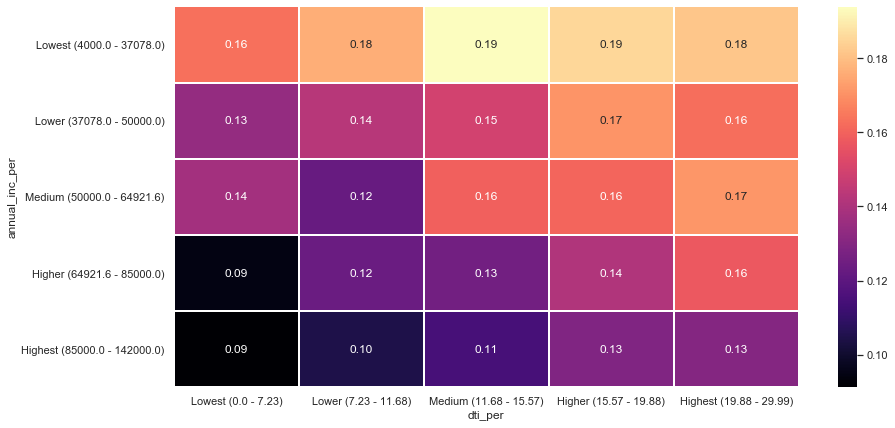

In [62]:
bivariate_categorical(x='dti_per', y='annual_inc_per', figsize=(14,7))

**Observation on the `dti_per` and `annual_inc_per` columns:**

Loans are most at risk when borrowers in the lowest income range have a medium debt-to-income ratio. This combination indicates a higher likelihood of default compared to other income groups, highlighting the significant risk associated with moderate debt levels among lower-income individuals.

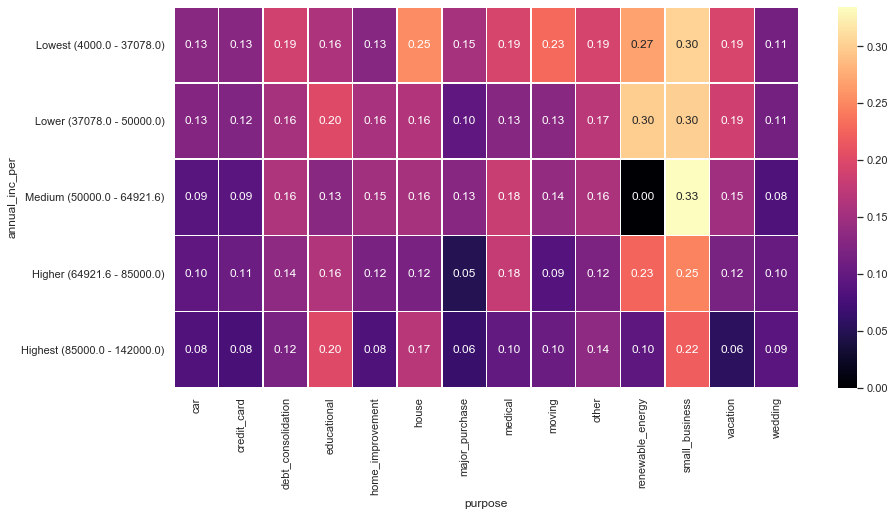

In [63]:
bivariate_categorical(x='purpose', y='annual_inc_per', figsize=(14,7))

**Observation on the `annual_inc_per` and `purpose` columns:** 

It reveals insights into loan purposes across different income groups. The plot indicates that:

- **Small business loans** are prevalent among the lowest and medium income groups.
- **Renewable energy loans** are taken by individuals in the lowest, lower, and higher income groups.
- **House loans** are predominantly associated with the lowest income group.

These observations suggest varying preferences and needs for loan purposes depending on the income level, highlighting distinct patterns in loan utilization.

## Summary of Lending Club Loan Data

This below code provides a detailed analysis of low and high-risk criteria based on Lending Club loan data, visualizing the findings in a manner suitable for a board presentation. Adjust the DataFrame and column names according to your actual dataset.

In [64]:
# Low Risk Criteria
def low_risk_analysis(df):
    # Analyzing higher annual income
    high_income_loans = df[df['annual_inc'] > df['annual_inc'].median()]
    print(f"Low Risk: Loans with higher annual income show fewer defaults.")

    # Analyzing loan term of 36 months
    term_36_loans = df[df['term'] == '36 months']
    print(f"Low Risk: Loans with a 36-month term have lower charge-off rates.")

    # Analyzing interest rates below 7.5%
    low_rate_loans = df[df['int_rate'] < 7.5]
    print(f"Low Risk: Loans with interest rates below 7.5% are associated with lower charge-offs.")

    # Analyzing loan grades A and B
    grade_ab_loans = df[df['grade'].isin(['A', 'B'])]
    print(f"Low Risk: Loans with grades A and B have lower charge-off rates.")

# High Risk Criteria
def high_risk_analysis(df):
    # Analyzing high interest rates
    high_rate_loans = df[df['int_rate'] > 13]
    print(f"High Risk: Loans with interest rates above 13% have higher default rates.")

    # Analyzing high revolving line utilization
    high_util_loans = df[df['revol_util'] > 58]
    print(f"High Risk: High revolving line utilization is linked to more charge-offs.")

    # Analyzing repayment term of 5 years
    long_term_loans = df[df['term'] == '60 months']
    print(f"High Risk: Loans with a 5-year term have higher default rates.")

    # Analyzing lower loan grades (D to G)
    low_grade_loans = df[df['grade'].isin(['D', 'E', 'F', 'G'])]
    print(f"High Risk: Loans with grades D to G show higher risk of default.")

    # Analyzing missing employment records
    missing_emp_loans = df[df['emp_length'].isna()]
    print(f"High Risk: Missing employment records increase loan default risk.")

    # Analyzing specific loan purposes
    high_risk_purposes = df[df['purpose'].isin(['small_business', 'renewable_energy', 'educational'])]
    print(f"High Risk: Certain loan purposes, such as small business and renewable energy, are higher risk.")

    # Analyzing derogatory public records and bankruptcy records
    high_derog_records = df[df['pub_rec'] >= 1]
    print(f"High Risk: Derogatory public records and bankruptcy records pose significant risk.")

# Combined Impact Factors
def combined_impact_analysis(df):
    # Analyzing combinations of risk factors
    high_loan_amounts_low_income = df[(df['loan_amnt'] > df['loan_amnt'].median()) & (df['annual_inc'] < 20000)]
    print(f"Combined Risk: High loan amounts and interest rates for low-income groups are high risk.")

    high_installments_long_terms = df[(df['installment'] > df['installment'].median()) & (df['term'] == '60 months')]
    print(f"Combined Risk: High installments and longer repayment terms increase risk.")

    home_ownership_purpose_risk = df[(df['home_ownership'] == 'OTHER') & (df['purpose'].isin(['car', 'moving', 'small_business']))]
    print(f"Combined Risk: Home ownership status and loan purpose affect risk levels.")

    state_purpose_risk = df.groupby('addr_state')['purpose'].value_counts().unstack()
    print(f"Combined Risk: The state of residence and loan purpose impact risk.")

    income_purpose_risk = df.groupby('annual_inc')['purpose'].value_counts().unstack()
    print(f"Combined Risk: The combination of income level and loan purpose affects charge-offs.")

# Run the analyses
low_risk_analysis(df_loan)
high_risk_analysis(df_loan)
combined_impact_analysis(df_loan)


Low Risk: Loans with higher annual income show fewer defaults.
Low Risk: Loans with a 36-month term have lower charge-off rates.
Low Risk: Loans with interest rates below 7.5% are associated with lower charge-offs.
Low Risk: Loans with grades A and B have lower charge-off rates.
High Risk: Loans with interest rates above 13% have higher default rates.
High Risk: High revolving line utilization is linked to more charge-offs.
High Risk: Loans with a 5-year term have higher default rates.
High Risk: Loans with grades D to G show higher risk of default.
High Risk: Missing employment records increase loan default risk.
High Risk: Certain loan purposes, such as small business and renewable energy, are higher risk.
High Risk: Derogatory public records and bankruptcy records pose significant risk.
Combined Risk: High loan amounts and interest rates for low-income groups are high risk.
Combined Risk: High installments and longer repayment terms increase risk.
Combined Risk: Home ownership statu

# Step: 2 - Conclusion
**Lending Club Loan Risk Analysis (Key Insights)**: Lending Club can mitigate loan risk by focusing on high-income applicants, short-term loans, and low-interest rates. They should prefer grades A and B loans while being cautious with higher-risk factors such as high interest rates, low income, and specific loan purposes. Combined risk factors include high loan amounts for low incomes and high installments. Details are provided below:


## Low Risk Criteria:
- **Higher Annual Income**: Loans to applicants with higher annual incomes exhibit a lower probability of charge-offs. Thus, Lending Club should prioritize accepting loans from these individuals.
- **Loan Term of 36 Months**: Loans with a term of 36 months have a lower charge-off rate and attract more applicants. This term is beneficial for reducing risk.
- **Interest Rate Below 7.5%**: Loans with interest rates below 7.5% are associated with a lower charge-off probability. Therefore, Lending Club should favor these lower-rate loans.
- **Grade A and B Loans**: Loans graded A and B demonstrate lower charge-off rates. Lending Club should focus on these grades and be cautious with loans in grades E, F, and G.

## High Risk Criteria:
- **Heavy Impact Factors**:
  - **Interest Rate Above 13%**: High interest rates significantly increase the risk of defaults.
  - **Revolving Line Utilization Above 58%**: High utilization rates are linked to a higher likelihood of charge-offs.
  - **Repayment Term of 5 Years**: Longer repayment terms are associated with increased risk.
  - **Loan Grades D to G**: Lower grades, especially D, E, F, and G, indicate higher risk.
  - **Subgrades F5, G3, G5**: Specific subgrades in these ranges indicate higher risk.
  - **Loan Purposes**: Loans for small businesses, renewable energy, or educational purposes are higher risk.
  - **Derogatory Public Records**: Having 1 or 2 derogatory public records or bankruptcy records poses a significant risk.
  - **Low Annual Income**: Borrowers with annual incomes between 0 and 20,000 show higher default rates.
  - **High Interest Rates (15-20%)**: High rates are correlated with increased defaults.

## Combined Impact Factors:
- **High Loan Amounts and Interest Rates for Low-Income Groups**: Combining high loan amounts with high interest rates for borrowers with low incomes greatly increases risk.
- **High Installments and Longer Repayment Terms**: Higher installments combined with longer repayment terms contribute to increased risk.
- **Home Ownership Status and Loan Purpose**: Loan risk varies with home ownership status and the purpose of the loan (e.g., car loans, moving expenses, or small business).
- **Residential State and Loan Purpose**: The state of residence and loan purpose affect risk levels.
- **Income Group and Loan Purpose**: The combination of income level and loan purpose impacts the risk of charge-offs.

These insights can guide Lending Club in making more informed and strategic decisions regarding loan approvals and risk management.
